In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
X = data[data.columns[:-1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Single tree with no depth limit

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.671


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["trestbps", "target"],
                impurity=False, filled=True)

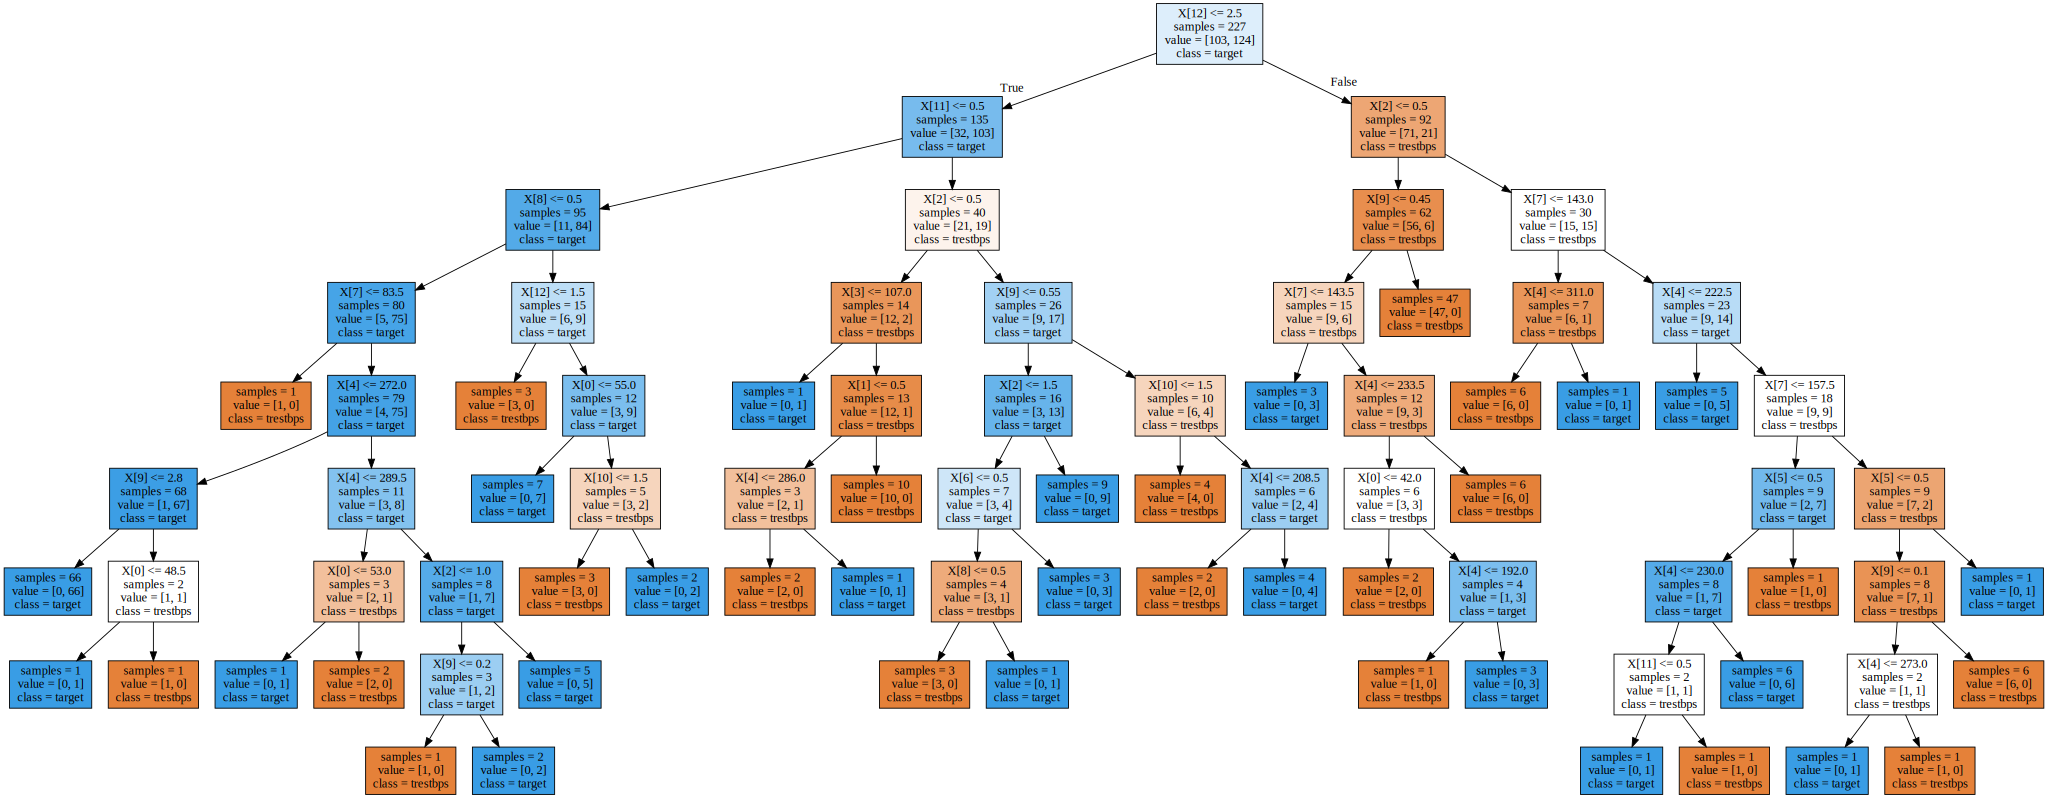

In [6]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Single tree with limited depth

In [7]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.881
Правильность на тестовом наборе: 0.750


In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["trestbps", "target"],
                impurity=False, filled=True)

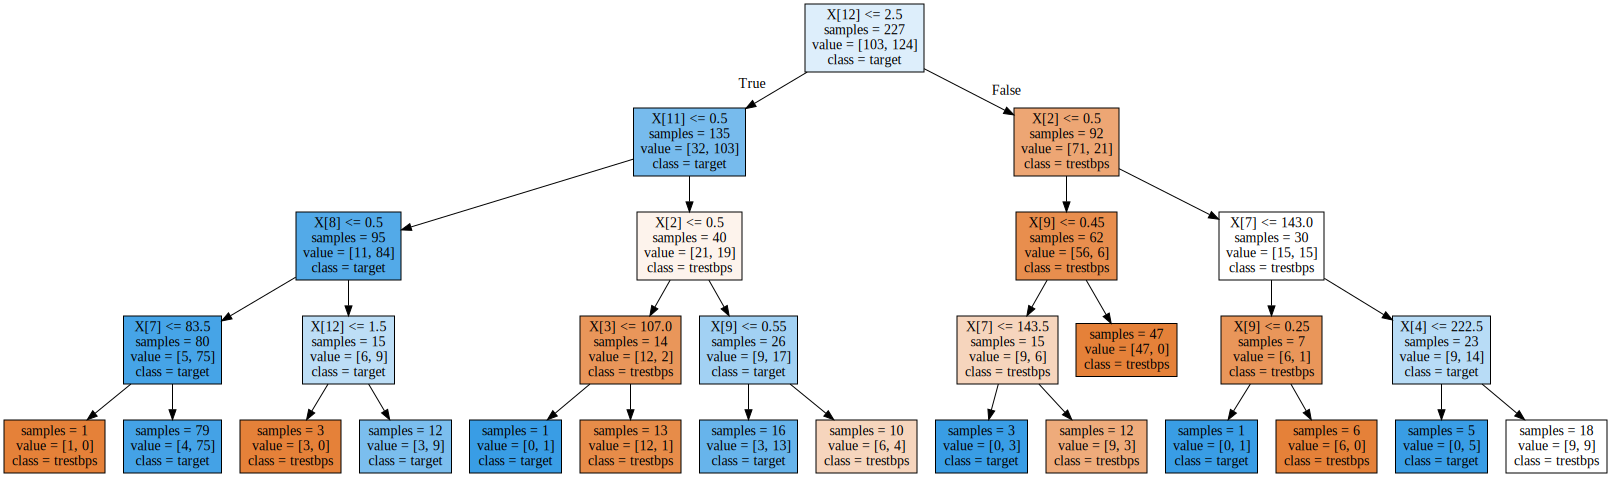

In [9]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Random forest

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

forest = RandomForestClassifier(n_estimators=2, random_state=0)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.916
Правильность на тестовом наборе: 0.658


In [11]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.         0.         0.15019427 0.02098348 0.02594425 0.
 0.         0.09029341 0.03815853 0.09875315 0.         0.1250057
 0.45066722]


# L1-regularization

In [12]:
from sklearn.linear_model import Ridge, LogisticRegression

for C in [0.001, 1, 100]:
    L1_lr = LogisticRegression(C=C,penalty="l1").fit(X_train, y_train)
    print("L1 train C={:.3f}: {:.4f}".format(C, L1_lr.score(X_train, y_train)))
    print("L1 test  C={:.3f}: {:.4f}".format(C, L1_lr.score(X_test, y_test)))
    print(L1_lr.coef_)
    print()

L1 train C=0.001: 0.5463
L1 test  C=0.001: 0.5395
[[0.        0.        0.        0.        0.        0.        0.
  0.0011921 0.        0.        0.        0.        0.       ]]

L1 train C=1.000: 0.8502
L1 test  C=1.000: 0.8684
[[ 0.02013554 -1.21963915  0.69780168 -0.01166438 -0.00488325  0.
   0.28850312  0.025094   -0.83568537 -0.40868656  0.67152464 -0.90417959
  -0.74339121]]

L1 train C=100.000: 0.8546
L1 test  C=100.000: 0.8289
[[ 0.00629376 -1.51998552  0.79011946 -0.01567937 -0.00595349 -0.31141098
   0.35442454  0.01788225 -1.05806324 -0.45938203  0.78905831 -0.9778617
  -0.95446934]]



# Cross-validation

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=5)

array([0.76086957, 0.69565217, 0.80434783, 0.77777778, 0.72727273])

# Gradient boost

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

## Gradient boost 

In [15]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))
        

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.842


## Gradient boost with limited depth

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.885
Правильность на тестовом наборе: 0.855


## Gradient boost with a learning speed factor of 0.01

In [17]:
gbrt = GradientBoostingClassifier(learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.890
Правильность на тестовом наборе: 0.855


## Gradient boost with a learning speed factor of 0.01

In [18]:
gbrt = GradientBoostingClassifier(learning_rate=1)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.789
